<a href="https://colab.research.google.com/github/dincbariscagri/cng562/blob/master/Din%C3%A7_Otto_Product_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Download From Kaggle

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import os

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle 

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"dincbariscagri","key":"4f5bc4e9a909993dbfa5e71d78faa089"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [15]:
!kaggle competitions download -c otto-group-product-classification-challenge
!unzip train.csv.zip

  0% 0.00/3.34M [00:00<?, ?B/s]
100% 3.34M/3.34M [00:00<00:00, 110MB/s]
  0% 0.00/1.59M [00:00<?, ?B/s]
100% 1.59M/1.59M [00:00<00:00, 107MB/s]
  0% 0.00/3.79M [00:00<?, ?B/s]
100% 3.79M/3.79M [00:00<00:00, 126MB/s]
Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
dataset = pd.read_csv("train.csv")
dataset = dataset.drop('id',axis=1)

X= pd.get_dummies(dataset.drop('target',axis=1),drop_first=True).iloc[:,:].values
Y= dataset.iloc[:,93].values

In [0]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_Y = LabelEncoder()
Y = labelEncoder_Y.fit_transform(Y)

In [0]:
from keras.utils import np_utils
dummy_y = np_utils.to_categorical(Y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,dummy_y,test_size=0.20)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Train

In [21]:
#Artificial Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

def keras_model():
    classifier = Sequential()
    classifier.add(Dense(51,kernel_initializer='uniform', activation='relu', input_dim=93))
    classifier.add(Dense(9,kernel_initializer='uniform', activation='softmax'))
    classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return classifier

classifier = keras_model()
print(classifier.summary())

history = classifier.fit(X_train, y_train, epochs=100, batch_size=150,validation_split=0.2)
y_pred= classifier.predict(X_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 51)                4794      
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 468       
Total params: 5,262
Trainable params: 5,262
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 39601 samples, validate on 9901 samples
Epoch 1/100
39601/39601 [==============================] - 4s 88us/step - loss: 1.0695 - acc: 0.6723 - val_loss: 0.7288 - val_acc: 0.7329
Epoch 2/100
39601/39601 [==============================] - 1s 20us/step - loss: 0.6636 - acc: 0.7510 - val_loss: 0.6556 - val_acc: 0.7514
Epoch 3/100
39601/39601 [==============================] - 1s 21us/step - loss: 0.6138 - acc: 0.7652 - val_loss: 0.6272 - val_acc: 0.7639
Epoch 4/100
39601/39

## Graphs

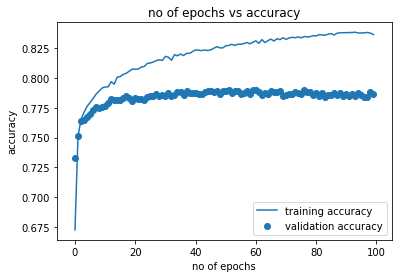

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,100)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

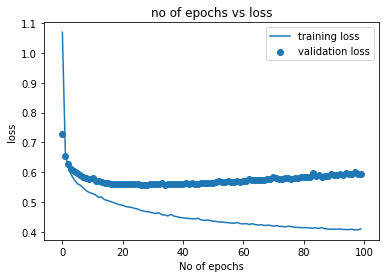

In [23]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,100)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn=keras_model, epochs=100, batch_size=500)

from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator, X, dummy_y, cv=10)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100
55690/55690 [==============================] - 1s 9us/step - loss: 1.1554 - acc: 0.6771
Epoch 2/100
55690/55690 [==============================] - 0s 7us/step - loss: 0.6526 - acc: 0.7634
Epoch 3/100
55690/55690 [==============================] - 0s 6us/step - loss: 0.6040 - acc: 0.7731
Epoch 4/100
55690/55690 [==============================] - 0s 7us/step - loss: 0.5807 - acc: 0.7809
Epoch 5/100
55690/55690 [==============================] - 0s 7us/step - loss: 0.5648 - acc: 0.7859
Epoch 6/100
55690/55690 [==============================] - 0s 6us/step - loss: 0.5531 - acc: 0.7889
Epoch 7/100
55690/55690 [==============================] - 0s 6us/step - loss: 0.5439 - acc: 0.7916
Epoch 8/100
55690/55690 [==============================] - 0s 7us/step - loss: 0.5360 - acc: 0.7950
Epoch 9/100
55690/55690 [==============================] - 0s 6us/step - loss: 0.5286 - acc: 0.7969
Epoch 10/100
55690/55690 [==============================] - 0s 6us/step - loss: 0.5232 - acc: 0.7993

KeyboardInterrupt: ignored

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)

## Other Models

In [26]:
#Support Vector Machines
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

classifierSVM = SVC(kernel="rbf", gamma="auto")
classifierSVM.fit(X_train,y_train)
y_predictSVM = classifierSVM.predict(X_test)

cmSVM =confusion_matrix(y_test,y_predictSVM)
accuracy_score(y_test,y_predictSVM)

0.7899159663865546

In [0]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier 

classifierKNN = KNeighborsClassifier(n_neighbors=17, metric="minkowski", p=2)
classifierKNN.fit(X_train,y_train)
y_predictKNN = classifierKNN.predict(X_test)

cmKNN =confusion_matrix(y_test,y_predictKNN)
accuracy_score(y_test,y_predictKNN)

In [0]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(solver= 'lbfgs', hidden_layer_sizes= (30, 10), alpha= 1e-5)
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)


cmSVM =confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

In [0]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

regressorRFR = RandomForestRegressor(n_estimators=100,max_depth=2)
regressorRFR.fit(X_train,y_train)

Y_predRFR = regressorRFR.predict(X_test)

In [0]:
#XGBoost
from xgboost import XGBClassifier

classifierXGB = XGBClassifier(max_depth=3, n_estimators=1000,learning_rate=0.01,subsample=0.8,colsample_bytree=1, gamma=1)
classifierXGB.fit(X_train,y_train)

y_predict = classifierXGB.predict(X_test)
cmXGB =confusion_matrix(y_test,y_predict)
accuracy_score(y_test,y_predict)